In this project, we’ll analyze data from the NBA (National Basketball Association) and explore possible associations.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
nba = pd.read_csv('data.csv')

In [5]:
nba

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5
...,...,...,...,...,...,...,...,...,...,...,...
24354,201504280LAC,2015,Spurs,Clippers,A,1,111,107,W,0.383515,4
24355,201504290ATL,2015,Nets,Hawks,A,1,97,107,L,0.238122,-10
24356,201504300SAS,2015,Spurs,Clippers,H,1,96,102,L,0.684116,-6
24357,201505010BRK,2015,Nets,Hawks,H,1,87,111,L,0.484831,-24


In [6]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24359 entries, 0 to 24358
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        24359 non-null  object 
 1   year_id        24359 non-null  int64  
 2   fran_id        24359 non-null  object 
 3   opp_fran       24359 non-null  object 
 4   game_location  24359 non-null  object 
 5   is_playoffs    24359 non-null  int64  
 6   pts            24359 non-null  int64  
 7   opp_pts        24359 non-null  int64  
 8   game_result    24359 non-null  object 
 9   forecast       24359 non-null  float64
 10  point_diff     24359 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB


for example lets nalize nba matches to 2010 season and 2014 season

In [7]:
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

In [8]:
nba_2010

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13
...,...,...,...,...,...,...,...,...,...,...,...
22162,201006080BOS,2010,Celtics,Lakers,H,1,84,91,L,0.642039,-7
22163,201006100BOS,2010,Celtics,Lakers,H,1,96,89,W,0.610370,7
22164,201006130BOS,2010,Celtics,Lakers,H,1,92,86,W,0.627127,6
22165,201006150LAL,2010,Celtics,Lakers,A,1,67,89,L,0.361360,-22


In [9]:
nba_2014

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
23468,201310300CLE,2014,Nets,Cavaliers,A,0,94,98,L,0.611981,-4
23469,201310300NYK,2014,Knicks,Bucks,H,0,90,83,W,0.793150,7
23470,201310300SAS,2014,Spurs,Grizzlies,H,0,101,94,W,0.692980,7
23471,201310300TOR,2014,Celtics,Raptors,A,0,87,93,L,0.361233,-6
23472,201310300UTA,2014,Thunder,Jazz,A,0,101,98,W,0.526056,3
...,...,...,...,...,...,...,...,...,...,...,...
23927,201406050SAS,2014,Spurs,Heat,H,1,110,95,W,0.751351,15
23928,201406080SAS,2014,Spurs,Heat,H,1,96,98,L,0.763623,-2
23929,201406100MIA,2014,Spurs,Heat,A,1,111,92,W,0.479975,19
23930,201406120MIA,2014,Spurs,Heat,A,1,107,86,W,0.527790,21


analize data about 'Knicks' team and 'Nets' team

In [18]:
nba_2010_knicks = nba_2010[nba_2010['fran_id'] == 'Knicks']
nba_2014_knicks = nba_2014[nba_2014['fran_id'] == 'Knicks']
nba_2010_nets = nba_2010[nba_2010['fran_id'] == 'Nets']
nba_2014_nets = nba_2014[nba_2014['fran_id'] == 'Nets']

analize score of teams

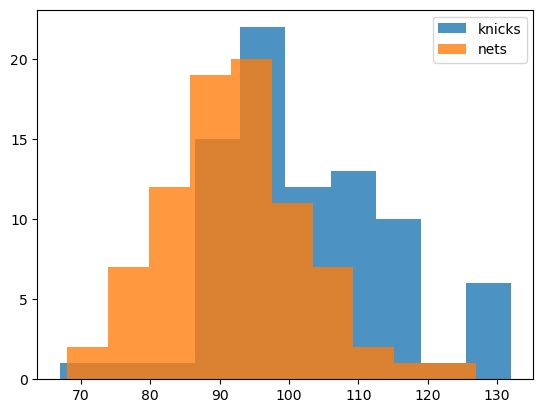

In [21]:
plt.hist(nba_2010_knicks['pts'], alpha=0.8, label='knicks')
plt.hist(nba_2010_nets['pts'], alpha=0.8, label='nets')
plt.legend()
plt.show()

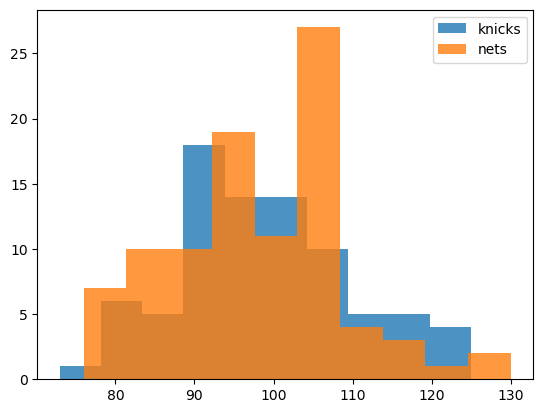

In [22]:
plt.hist(nba_2014_knicks['pts'], alpha=0.8, label='knicks')
plt.hist(nba_2014_nets['pts'], alpha=0.8, label='nets')
plt.legend()
plt.show()

In [14]:
nba_2010_knicks_mean = np.mean(nba_2010_knicks['pts'])
nba_2014_knicks_mean = np.mean(nba_2014_knicks['pts'])
nba_2010_nets_mean = np.mean(nba_2010_nets['pts'])
nba_2014_nets_mean = np.mean(nba_2014_nets['pts'])

In [39]:
nba_2010_nets_mean

92.3780487804878

lets analize nba_2010 data. oes this chart suggest that fran_id and pts are associated? Which pairs of teams, if any, earn different average scores per game?

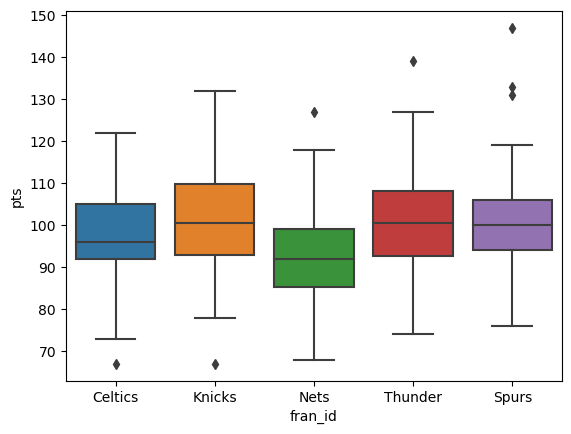

In [26]:
plt.clf()
sns.boxplot(data =nba_2010, x = 'fran_id', y ='pts' )
plt.show()

from barplot we can see differences in median points from the game between diffent fran_id's. thats mean that poits are associable from fran_id.

lets see at the crosstab of Knikcs in 2010 season

In [29]:
location_result_freq_knicks = pd.crosstab(nba_2010_knicks['game_result'], nba_2010_knicks['game_location'])

In [30]:
location_result_freq_knicks

game_location,A,H
game_result,,
L,30,23
W,11,18


and now let see at the crosstab of Nets in 2010 season

In [31]:
location_result_freq_nets = pd.crosstab(nba_2010_nets['game_result'], nba_2010_nets['game_location'])

In [32]:
location_result_freq_nets

game_location,A,H
game_result,,
L,37,33
W,4,8


from this tabs we can see that teams have more wins on home games.

let see proportions of this tabs

In [33]:
location_result_proportions_knicks = location_result_freq_knicks/len(nba_2010_knicks)

In [34]:
location_result_proportions_knicks

game_location,A,H
game_result,,
L,0.365854,0.280488
W,0.134146,0.219512


In [35]:
location_result_proportions_nets = location_result_freq_nets/len(nba_2010_nets)

In [36]:
location_result_proportions_nets

game_location,A,H
game_result,,
L,0.45122,0.402439
W,0.04878,0.097561


lets see at the chi-square statistics of the teams

In [42]:
chi2_knicks, pval_knicks, dof_knicks, expected_knicks = chi2_contingency(location_result_freq_knicks)
print(expected_knicks)
print(chi2_knicks)

[[26.5 26.5]
 [14.5 14.5]]
1.9206245933636956


In [43]:
chi2_nets, pval_nets, dof_nets, expected_nets = chi2_contingency(location_result_freq_nets)
print(expected_nets)
print(chi2_nets)

[[35. 35.]
 [ 6.  6.]]
0.8785714285714286


let see to the covvariance between 'forecast' and 'point_diff'

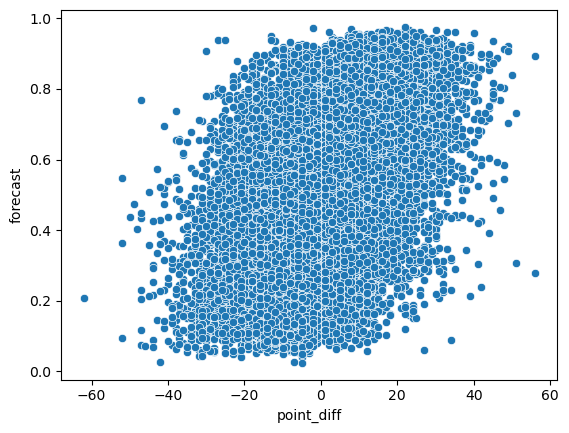

In [52]:
sns.scatterplot(data = nba, x = 'point_diff', y = 'forecast' )
plt.show()

In [53]:
cov = np.cov(nba['point_diff'], nba['forecast'])

In [54]:
cov

array([[1.77982811e+02, 1.32022064e+00],
       [1.32022064e+00, 4.53921727e-02]])

In [51]:
point_diff_forecast_corr = pearsonr(nba['point_diff'], nba['forecast'])
print(point_diff_forecast_corr)

(0.4644799841112692, 0.0)


In [67]:
nba_celtics = nba[nba['fran_id'] == 'Celtics']

let see celtics's scatter plot

In [68]:
nba_celtics

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
5,194611090DTF,1947,Celtics,Falcons,A,0,46,69,L,0.386818,-23
7,194611130CHS,1947,Celtics,Stags,A,0,61,71,L,0.291740,-10
8,194611140STB,1947,Celtics,Bombers,A,0,62,64,L,0.313890,-2
...,...,...,...,...,...,...,...,...,...,...,...
24338,201504150MIL,2015,Celtics,Bucks,A,0,105,100,W,0.448084,5
24343,201504190CLE,2015,Celtics,Cavaliers,A,1,100,113,L,0.263276,-13
24345,201504210CLE,2015,Celtics,Cavaliers,A,1,91,99,L,0.250867,-8
24348,201504230BOS,2015,Celtics,Cavaliers,H,1,95,103,L,0.502943,-8


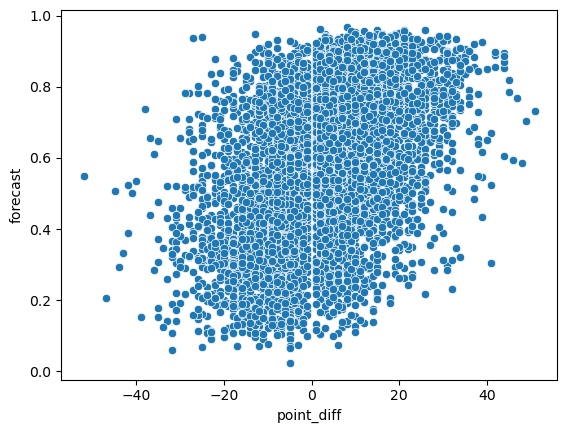

In [69]:
sns.scatterplot(data = nba_celtics, x = 'point_diff', y = 'forecast' )
plt.show()

In [70]:
point_diff_forecast_corr = pearsonr(nba_celtics['point_diff'], nba_celtics['forecast'])
print(point_diff_forecast_corr)

(0.4387265985596127, 1.150406593365364e-280)
